<div style="border:solid Chocolate 2px; padding: 40px">
<b>Привет, Мария!👋</b>
    
Меня зовут Зуева Юлия, можно просто Юля 😏 Я буду ревьюером твоего проекта. Предлагаю обращаться на "ты", но если это неудобно, пожалуйста, скажи об этом!
    
Моя основная цель - помочь тебе стать компетентным Data Scientist'ом: вместе преодолеть трудности и еще больше развить твои сильные навыки 💪 Очень постараюсь сделать это как можно быстрее :) В твоей работе я оставила комментарии, которые должны в этом помочь. Для твоего удобства комментарии расскрашены разными цветами: 
<br/>
<div class="alert alert-success">
<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным, или если я посчитаю нужным тебя за что-то похвалить. На такие решения можно опираться в будущих проектах.
</div>
<div class="alert alert-warning">
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).
</div>
<div class="alert alert-block alert-danger">
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
Чтобы наша с тобой работа была еще эффективнее, ты точно так же можешь оставлять комментарии и задавать мне вопросы. Для таких случаев, пожалуйста, выбери собственное оформление комментариев, которое будет отличаться от моего, чтобы не создавалась путаница. По этой же причине попрошу тебя не удалять и не изменять мои комментарии. Все это позволит лучше ориентироваться в нашем с тобой диалоге, а повторную проверку (в случае ее необходимости) выполнять оперативнее 🚀
    
Не спеши расстраиваться, если что-то не удалось с первого раза. Вместе мы обязательно разберемся со всеми трудностями! 🤓

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

**Ход исследования:**

- Загрузка и подготовка данных
- Подготовка выборки для обучения моделей.
- Обучение моделей, одна из которых — LightGBM.
- Анализ время обучения, время предсказания и качество моделей.
- Выбор лучшей модели, проверка качества на тестовой выборке.

In [1]:
!pip install phik -q
!pip install --upgrade scikit-learn -q
!pip install category_encoders -q
!pip install --upgrade category_encoders -q

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    cross_validate,
    GridSearchCV
)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from category_encoders import TargetEncoder

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error

from phik import phik_matrix

import time

<div class="alert alert-warning">
<h3> Комментарий ревьюера <a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b>

* Если перед строкой с установкой новой библиотеки поставить восклицательный знак, ее можно поместить в ячейку с другим кодом.


* Чтобы при установке новой библиотеки не выводилась информация о процессе и зависимостях, можно добывлять опцию `--quiet` или простооки `-q`.

<div class="alert alert-warning">
<h3> Комментарий ревьюера <a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b>


* Чтобы работа выглядела аккуратнее, импорты можно структурировать по тематике: для работы с данными, графики, для подготовки к моделированию, моделирование и т.д. Обртати внимание, что некоторые методы у тебя импортируются несколько раз, стоит навести порядок.
    
    
* Если расположить методы на отдельных строках, читать будет удобнее: 
    
    ```python
from sklearn.preprocessing import (
      OneHotEncoder,
      OrdinalEncoder
)
```

Исправила и разбила на группы

<div class="alert alert-success">
<h3> Комментарий ревьюера 2<a class="tocSkip"> </h3> 
    
<b>Все отлично! 👍:</b> 😉

## Подготовка данных

In [2]:
autos = pd.read_csv('/datasets/autos.csv')
autos.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


<div class="alert alert-warning">
<h3> Комментарий ревьюера <a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> Если не ограничивать количество выводимой информации, то вывод ограничится только при отображении, но в json (в виде которых хранятся jupyter ноутбуки) на диске будут все данные, что будет тормозить открытие и работу тетрадки. Чтобы такого не происходило, следует ограничивать вывод несколькими строками: `head`, `tail`, `sample`.

<div class="alert alert-success">
<h3> Комментарий ревьюера 2<a class="tocSkip"> </h3> 
    
<b>Все отлично! 👍:</b> 😉

In [3]:
#приведение название колонок в датафрейме к snake_case
autos.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', i).replace(' ', '_').lower() for i in autos.columns]
autos.head()

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired,date_created,number_of_pictures,postal_code,last_seen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
autos.isna().sum()

date_crawled              0
price                     0
vehicle_type          37490
registration_year         0
gearbox               19833
power                     0
model                 19705
kilometer                 0
registration_month        0
fuel_type             32895
brand                     0
repaired              71154
date_created              0
number_of_pictures        0
postal_code               0
last_seen                 0
dtype: int64

In [5]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   date_crawled        354369 non-null  object
 1   price               354369 non-null  int64 
 2   vehicle_type        316879 non-null  object
 3   registration_year   354369 non-null  int64 
 4   gearbox             334536 non-null  object
 5   power               354369 non-null  int64 
 6   model               334664 non-null  object
 7   kilometer           354369 non-null  int64 
 8   registration_month  354369 non-null  int64 
 9   fuel_type           321474 non-null  object
 10  brand               354369 non-null  object
 11  repaired            283215 non-null  object
 12  date_created        354369 non-null  object
 13  number_of_pictures  354369 non-null  int64 
 14  postal_code         354369 non-null  int64 
 15  last_seen           354369 non-null  object
dtypes:

Видим, что наблюдаются пропуски в столбцах vehicle_type, gearbox, model, fuel_type, repaired. Кроме того, не все столбцы имеют корректный тип данных: date_crawled, date_created и last_seen должны иметь тип datetime. 

In [6]:
autos[['date_crawled', 'date_created', 'last_seen']] = autos[['date_crawled', 'date_created', 'last_seen']].apply(
    pd.to_datetime)
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date_crawled        354369 non-null  datetime64[ns]
 1   price               354369 non-null  int64         
 2   vehicle_type        316879 non-null  object        
 3   registration_year   354369 non-null  int64         
 4   gearbox             334536 non-null  object        
 5   power               354369 non-null  int64         
 6   model               334664 non-null  object        
 7   kilometer           354369 non-null  int64         
 8   registration_month  354369 non-null  int64         
 9   fuel_type           321474 non-null  object        
 10  brand               354369 non-null  object        
 11  repaired            283215 non-null  object        
 12  date_created        354369 non-null  datetime64[ns]
 13  number_of_pictures  354369 no

Изменили тип данных на datetime64[ns]

Посмотрим на уникальные значения в столбцах с категориальными значениями

In [7]:
categorical_columns = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'repaired']
for column in categorical_columns:
    unique_values = autos[column].unique()
    print(f"Уникальные значения в столбце '{column}': {unique_values}")

Уникальные значения в столбце 'vehicle_type': [nan 'coupe' 'suv' 'small' 'sedan' 'convertible' 'bus' 'wagon' 'other']
Уникальные значения в столбце 'gearbox': ['manual' 'auto' nan]
Уникальные значения в столбце 'model': ['golf' nan 'grand' 'fabia' '3er' '2_reihe' 'other' 'c_max' '3_reihe'
 'passat' 'navara' 'ka' 'polo' 'twingo' 'a_klasse' 'scirocco' '5er'
 'meriva' 'arosa' 'c4' 'civic' 'transporter' 'punto' 'e_klasse' 'clio'
 'kadett' 'kangoo' 'corsa' 'one' 'fortwo' '1er' 'b_klasse' 'signum'
 'astra' 'a8' 'jetta' 'fiesta' 'c_klasse' 'micra' 'vito' 'sprinter' '156'
 'escort' 'forester' 'xc_reihe' 'scenic' 'a4' 'a1' 'insignia' 'combo'
 'focus' 'tt' 'a6' 'jazz' 'omega' 'slk' '7er' '80' '147' '100' 'z_reihe'
 'sportage' 'sorento' 'v40' 'ibiza' 'mustang' 'eos' 'touran' 'getz' 'a3'
 'almera' 'megane' 'lupo' 'r19' 'zafira' 'caddy' 'mondeo' 'cordoba' 'colt'
 'impreza' 'vectra' 'berlingo' 'tiguan' 'i_reihe' 'espace' 'sharan'
 '6_reihe' 'panda' 'up' 'seicento' 'ceed' '5_reihe' 'yeti' 'octavia' '

Выберем информативные признаки, которые особенно влияют на рыночную стоимость автомобиля

Признаки:

- VehicleType — тип автомобильного кузова
- RegistrationYear — год регистрации автомобиля
- Gearbox — тип коробки передач
- Power — мощность (л. с.)
- Model — модель автомобиля
- Kilometer — пробег (км)
- FuelType — тип топлива
- Brand — марка автомобиля
- Repaired — была машина в ремонте или нет



Выделим только необходимые столбцы в датафрейме

In [8]:
autos.columns

Index(['date_crawled', 'price', 'vehicle_type', 'registration_year', 'gearbox',
       'power', 'model', 'kilometer', 'registration_month', 'fuel_type',
       'brand', 'repaired', 'date_created', 'number_of_pictures',
       'postal_code', 'last_seen'],
      dtype='object')

In [9]:
selected_autos = autos[['price', 'vehicle_type', 'registration_year', 'gearbox',
       'power', 'model', 'kilometer', 'registration_month', 'fuel_type',
       'brand', 'repaired']]

<div class="alert alert-warning">
<h3> Комментарий ревьюера <a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> В целом согласна, в текущем виде отбрасываемые признаки не принесут особой пользы. Но в то же время они могут помочь сделать анализ более глубоким и точным.

<details> <summary> <span style='color:blue' > Развернуть подробнее. </span> </summary>

1. Даты могут быть использованы для проверки записей на актуальность (за несколько лет уровень цен мог измениться, поэтому единичные наблюдения за более ранние года будут создавать скорее шум, чем помогать) и на корректность порядка событий (что регистрация авто предшествует дате создания анкеты, а та, в свою очередь, предшествует дате выгрузки).

2. В разных географических регионах может быть разный уровень жизни, что также будет влиять на стоимость. Единственное - у нас довольно много уникальных значений, что будет тяжеловато обработать, но мы можем связать индексы с более крупными регионами (есть основания полагать, что данные собраны в Германии), либо взять первые несколько цифр индекса, чтобы очеретить только какие-то более менее крупные территории (обращаю внимание, что по причине хранения индекса в числовом формате у некоторых наблюдений могли пропасть первые нули в индексе).

</details>

Заполним пропуски в столбцах: vehicle_type, gearbox, model, fuel_type, repaired.

В столбце model пропуски заменим на 'unknown', тк не у всех автомобилей есть конкретная модель

В столбце gearbox пропуски заполним глобальным модальным значением

В столбце repaired заполним пропуски заглушкой 'unknown'

Также создадим функцию fillna_mode_per_group, которая заполняет пропуски в столбцах VehicleType и FuelType модой по группам, а если мода пустая - подставляет fill_value.

In [10]:
def fillna_mode_per_group(df, group_cols, current_col, fill_value="unknown"):
    mode_series = (
        df.groupby(group_cols)[current_col]
        .transform(lambda x: x.mode()[0] if not x.mode().empty else fill_value)
    )
    df[current_col] = df[current_col].fillna(mode_series)
    return df


In [11]:
# Заполняем model
selected_autos["model"] = selected_autos["model"].fillna("unknown")

# VehicleType по brand+model
selected_autos = fillna_mode_per_group(
    selected_autos,
    group_cols=["brand", "model"],
    current_col="vehicle_type",
    fill_value="unknown"
)

# FuelType по brand+model
selected_autos = fillna_mode_per_group(
    selected_autos,
    group_cols=["brand", "model"],
    current_col="fuel_type",
    fill_value="unknown"
)

# Gearbox глобальной модой
gearbox_mode = selected_autos["gearbox"].mode()[0]
selected_autos["gearbox"] = selected_autos["gearbox"].fillna(gearbox_mode)

# Repaired заглушкой
selected_autos["repaired"] = selected_autos["repaired"].fillna("unknown")


In [12]:
selected_autos['model'].value_counts()

golf                  29232
other                 24421
3er                   19761
unknown               19705
polo                  13066
                      ...  
i3                        8
serie_3                   4
rangerover                4
range_rover_evoque        2
serie_1                   2
Name: model, Length: 251, dtype: int64

In [13]:
selected_autos['vehicle_type'].value_counts()

sedan          107178
small           92569
wagon           68808
bus             32534
convertible     20475
coupe           16812
suv             12680
other            3313
Name: vehicle_type, dtype: int64

In [14]:
selected_autos['gearbox'].value_counts()

manual    288084
auto       66285
Name: gearbox, dtype: int64

In [15]:
selected_autos['fuel_type'].value_counts()

petrol      244344
gasoline    103623
lpg           5310
cng            565
hybrid         233
other          204
electric        90
Name: fuel_type, dtype: int64

In [16]:
selected_autos['repaired'].value_counts()

no         247161
unknown     71154
yes         36054
Name: repaired, dtype: int64

<div class="alert alert-warning">
<h3> Комментарий ревьюера<a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> 
    
* Некоторые характеристики авто (кроме Repaired, но включая мощность авто), скорее всего, взаимосвязаны, поэтому можно хотя бы частично с некоторой степенью точности попробовать восстановить их друг на основе друга, например, VehicleType по модели.  Истину мы таким образом не восстановим, но у такого способа заполнения тем не менее есть преимущества. Просто удалить все пропуски мы не можем, поскольку у нас их очень много, потеряем существенную часть данных. Заглушка для признаков с большим количеством категорий будет представлять скорее мусорную корзину, в которую будет сложено все вперемешку. Это сохранит наблюдения для обучения по другим признакам, в которых пропуска не было, но по самой заглушке мы едва ли найдем какую-то закономерность. Глобальная мода, очевидно, может создать, к примеру, для каких-то моделей типы кузова, которых у нее даже потенциально не могло быть. Заполнение же модой по группе сохраняет наблюдения, но при этом более менее встраивается в ценовые различия. То есть мы можем предполагать, что основым ценоопределяющим фактором будет модель авто (по ней можно удалить пропуски), а различия, к примеру, кузова, эту цену будет уже не так сильно менять, поэтому мы в целом можем "заглушить" пропуск самым частым кузовом у данной модели.
  
    А вот для Repaired при этом корректнее поставить заглушку. С моделью данный признак едва ли взаимосвязан (наличие ремонта скорее зависит от аккуратности предыдущих владельцев и условий эксплуатации). Если же просто заполняем модой - отсутствие ремонта, то по сути приравниваем тех, кто, возможно, умышленно умолчал о наличии ремонта, к тем, у кого его действительно не было, что тоже не совсем корректно.
    
    
* Код должен быть не только функциональным, доводить до результата, но и быть эффективным и читабельным. Обрати внимание, что функции, которые ты сейчас по отдельности создаешь для каждого признака, можно было бы сделать универсальными.
    
    
* Для заполнения по группе удобно использовать <a href='https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transform.html'>transform</a>. Применив его к сгруппированным данным, мы можем сказать ему, какой показатель нам необходимо определить (мода, медиана), и он определит его для каждой строки датасета в соответсвии с его группой. Затем мы можем использовать данный вектор для заполнения пропусков ччерез `fillna`. Единстевенное, важно учесть, что какая-то группа может содержать только пропуски, в таком случае мода не определеня, будет вылезать ошибка. Поэтому нам необходимо прописать условие на такой сслучай `lambda x: x.mode()[0] if not x.mode().empty else None`.
    
    
* Такого рода специфическую обработку по-хорошему нужно производить в пайпалайне в процессе обучения (поскольку она задействует другие данные), но для этого потребуется создавать кастомный трансформер, поэтому к этой обработке вне пайалайна относимся более снисходительно.

*Изменила способ заполнения пропусков*

<div class="alert alert-success">
<h3> Комментарий ревьюера 2<a class="tocSkip"> </h3> 
    
<b>Все отлично! 👍:</b> 😉

In [17]:
selected_autos.describe()

,price,registration_year,power,kilometer,registration_month
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645
std,4514.158514,90.227958,189.850405,37905.341530,3.726421
min,0.000000,1000.000000,0.000000,5000.000000,0.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000


По данной таблице можно сделать следующие выводы:

- В столбце price наблюдается 354369 значений. Средняя цена составляет 4416.66 евро. Стандартное отклонение, равное 4514.16, указывает на значительное разнообразие цен. Это говорит о том, что цены варьируются от очень низких до очень высоких. Минимальная цена равна 0 евро, что может указывать на наличие записей с отсутствующей или некорректной ценой.
25%: 25% автомобилей стоят менее 1050 евро.
50% (медиана) — половина автомобилей стоит менее 2700 евро.
75%: — 75% автомобилей стоят менее 6400 евро.
Максимальная цена составляет 20000 евро, что указывает на наличие дорогих автомобилей в наборе данных.

- В столбце registration_year наблюдается 354369 значений. mean: средний год регистрации автомобиля составляет 2004 год.
std: стандартное отклонение, равное 90.23, указывает на то, что годы регистрации варьируются.
min: минимальный год регистрации равен 1000, что явно является ошибкой или некорректным значением.
25%: 25% автомобилей зарегистрированы до 1999 года.
50% (медиана): половина автомобилей зарегистрирована до 2003 года.
75%: 75% автомобилей зарегистрированы до 2008 года.
max: максимальный год регистрации равен 9999, что также указывает на наличие некорректных значений.

- В столбце power наблюдается 354369 значений. mean: средняя мощность автомобиля составляет примерно 110.09 л.с.
std: стандартное отклонение, равное 189.85, указывает на значительное разнообразие мощностей.
min: минимальная мощность равна 0 л.с., что может указывать на наличие некорректных данных.
25%: 25% автомобилей имеют мощность менее 69 л.с.
50% (медиана): половина автомобилей имеет мощность менее 105 л.с.
75%: 75% автомобилей имеют мощность менее 143 л.с.
max: максимальная мощность составляет 20000 л.с., что является аномально высоким значением и указывает на наличие некорректных данных.

- В столбце kilometer наблюдается 354369 значений. mean: средний пробег автомобиля составляет примерно 128211.17 км.
std: стандартное отклонение, равное 37905.34, указывает на значительное разнообразие пробегов.
min: минимальный пробег составляет 5000 км.
25%: 25% автомобилей имеют пробег менее 125000 км.
50% (медиана): половина автомобилей имеет пробег менее 150000 км.
75%: 75% автомобилей имеют пробег менее 150000 км.
max: максимальный пробег составляет 150000 км, что указывает на наличие автомобилей с одинаковым максимальным пробегом.


Проанализируем целевой признак Price и его распределение

In [18]:
selected_autos['price'].value_counts()

0        10772
500       5670
1500      5394
1000      4649
1200      4594
         ...  
13180        1
10879        1
2683         1
634          1
8188         1
Name: price, Length: 3731, dtype: int64

Видим, что в данных встречаются значения равные 0 - это могут быть некорректно введенные данные (всего их 10772). Оставим в таблице данные, которые больше 0

In [19]:
selected_autos = selected_autos.query('price > 0')
selected_autos['price'].value_counts()

500      5670
1500     5394
1000     4649
1200     4594
2500     4438
         ... 
5240        1
13180       1
10879       1
2683        1
8188        1
Name: price, Length: 3730, dtype: int64

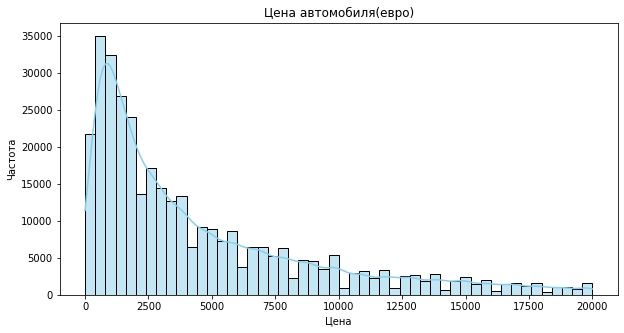

In [20]:
plt.figure(figsize=(10, 5))
sns.histplot(selected_autos['price'], bins=50, kde=True, color='skyblue')
plt.title(f'Цена автомобиля(евро)')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.show()

В столбце price данные разбросаны достаточно широко, наиболее часто встречающиеся значения находятся в диапозоне от 500-2500

Теперь построим диаграмму распределения, чтобы оценить выбросы

In [21]:
selected_autos.describe()

,price,registration_year,power,kilometer,registration_month
count,343597.000000,343597.000000,343597.000000,343597.000000,343597.000000
mean,4555.121974,2004.089797,111.000192,128337.616452,5.777891
std,4515.058553,78.413225,188.177974,37521.047429,3.698186
min,1.000000,1000.000000,0.000000,5000.000000,0.000000
25%,1200.000000,1999.000000,69.000000,125000.000000,3.000000
50%,2890.000000,2003.000000,105.000000,150000.000000,6.000000
75%,6500.000000,2008.000000,143.000000,150000.000000,9.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000


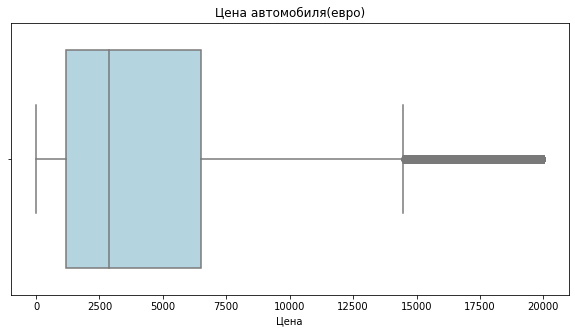

In [22]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=selected_autos['price'], color='lightblue')
plt.title(f'Цена автомобиля(евро)')
plt.xlabel(f'Цена')
plt.show()

Среднее значение: 4,555.12. Это средняя цена автомобилей в данном наборе данных.
25-й процентиль: 1,200, что означает, что 25% автомобилей стоят меньше этой суммы.
50-й процентиль (медиана): 2,890, что указывает на то, что половина автомобилей стоит меньше этой цены.
75-й процентиль: 6,500, что означает, что 75% автомобилей стоят меньше этой суммы.


Рассмотрим выбросы поподробнее

In [23]:
# Вычисляем Q1 и Q3
Q1 = selected_autos['price'].quantile(0.25)
Q3 = selected_autos['price'].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Идентификация выбросов
outliers = selected_autos[(selected_autos['price'] < lower_bound) | (selected_autos['price'] > upper_bound)]

# Выводим выбросы
print(outliers.shape)
print(f'Q1 = {Q1}')
print(f'Q3 = {Q3}')

(18907, 11)
Q1 = 1200.0
Q3 = 6500.0


Так как в этом столбце достаточно много выбросов, удалять их не стоит, ведь они могут содержать важную информацию, поэтому оставим эти значения без изменений

<div class="alert alert-success">
<h3> Комментарий ревьюера <a class="tocSkip"> </h3> 
    
<b>Все отлично! 👍:</b> С избавлением от низких цен согласна! Однако не стала бы их считать ошибочными, они вполне могут быть реальными, например, могут быть случаи, когда что-то в совсем плачевном состоянии готовы отдать даром на разборку. Или же это неявные пропуски - продавец решил не указывать цену в анкете, а озвучивать ее по запросу. В данном случае наша мотивация избавиться от такой цены, действительно, в том, чтобы не обучать модель ее предсказывать. Это сомнительно - клиент, не готовый отдавать что-то совсем даром, вряд ли будет рад увидеть такую оценку для своего автомобиля.

**Проанализируем признак registration_year**

In [24]:
selected_autos['registration_year'].describe()

count    343597.000000
mean       2004.089797
std          78.413225
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9999.000000
Name: registration_year, dtype: float64

По данной таблице можно заметить, что у нас некорректные данные (минимальное значение - 1000, максимальное значение - 9999)

Чтобы узнать дату выведем максимальное значение из столбца DateCrawled

In [25]:
autos['date_crawled'].max()

Timestamp('2016-04-07 14:36:58')

В столбце registration_year также укажем 2016 год максимальным, а автомобили появились и были запущены в серийное производство в 1886 году, поэтому сократим наши данные, удалив некорректные

In [26]:
selected_autos = selected_autos[
    (
        (selected_autos['registration_year'] >= 1886) &
        (selected_autos['registration_year'] < 2016)
    ) |
    (
        (selected_autos['registration_year'] == 2016) &
        (selected_autos['registration_month'] <= 4) &
        (selected_autos['registration_month'] > 0)  # исключим неизвестные месяцы
    )
]



selected_autos['registration_year'].describe()

count    322832.000000
mean       2002.305673
std           6.714409
min        1910.000000
25%        1999.000000
50%        2003.000000
75%        2007.000000
max        2016.000000
Name: registration_year, dtype: float64

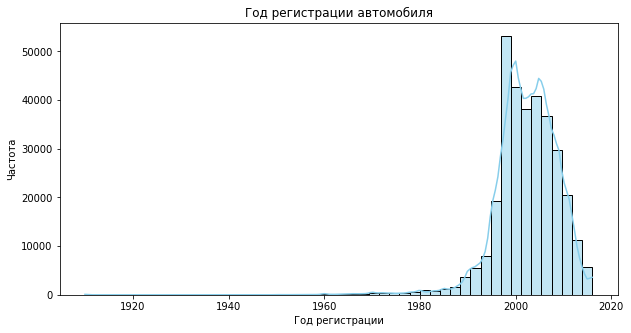

In [27]:
plt.figure(figsize=(10, 5))
sns.histplot(selected_autos['registration_year'], bins=50, kde=True, color='skyblue')
plt.title(f'Год регистрации автомобиля')
plt.xlabel('Год регистрации')
plt.ylabel('Частота')
plt.show()

По данному графику видим, что данные распредлены достаточно широко, наиболее распространенные значения встречаются в диапозоне от 1999 до 2016, рост диаграммы начинается у значения ~1980, поэтому мы можем удалить данные за период до 1960 года, тк эти значения встречаются крайне редко

In [28]:
selected_autos = selected_autos.query('1959 < registration_year < 2017')
selected_autos['registration_year'].describe()

count    322545.000000
mean       2002.359395
std           6.449159
min        1960.000000
25%        1999.000000
50%        2003.000000
75%        2007.000000
max        2016.000000
Name: registration_year, dtype: float64

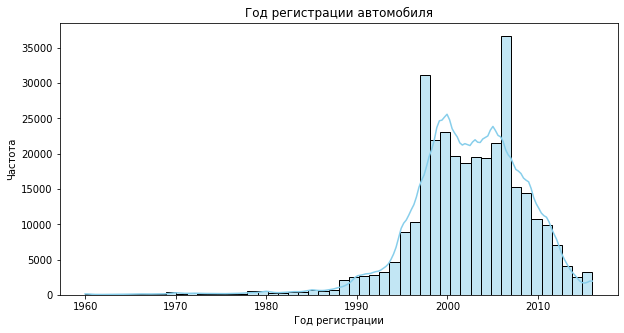

In [29]:
plt.figure(figsize=(10, 5))
sns.histplot(selected_autos['registration_year'], bins=50, kde=True, color='skyblue')
plt.title(f'Год регистрации автомобиля')
plt.xlabel('Год регистрации')
plt.ylabel('Частота')
plt.show()

Теперь также посмотрим на диаграмму рассеяния

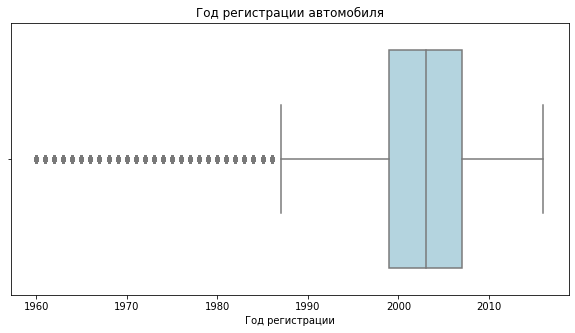

In [30]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=selected_autos['registration_year'], color='lightblue')
plt.title(f'Год регистрации автомобиля')
plt.xlabel(f'Год регистрации')
plt.show()

Среднее значение - 2002, медиана - 2003. Видим, что наблюдается достаточно много выбросов за пределами 1 квантиля(тк эти значения являются редкими)

<div class="alert alert-warning">
<h3> Комментарий ревьюера<a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> Можно также учитывать месяц регистрации и тот факт, что последняя выгрузка была произведена в апреле 2016, чтобы не терять корректные наблюдения с регистрацией в 2016 году, но не брать все, что позже апреля.

Учла также месяц

<div class="alert alert-success">
<h3> Комментарий ревьюера 2<a class="tocSkip"> </h3> 
    
<b>Все отлично! 👍:</b> 😉

**Рассмотрим признак power**

In [31]:
selected_autos['power'].describe()

count    322545.000000
mean        112.656166
std         181.610430
min           0.000000
25%          72.000000
50%         105.000000
75%         143.000000
max       20000.000000
Name: power, dtype: float64

В столбце power наблюдается 354369 значений. mean: средняя мощность автомобиля составляет примерно 112 л.с. std: стандартное отклонение, равное 185, указывает на значительное разнообразие мощностей. min: минимальная мощность равна 0 л.с., что может указывать на наличие некорректных данных. max: максимальная мощность составляет 20000 л.с., что является аномально высоким значением и указывает на наличие некорректных данных.

Построим диаграмму

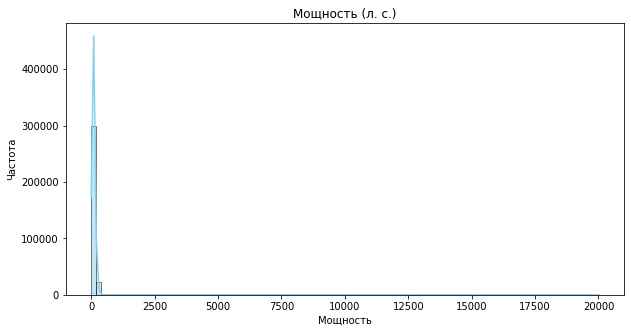

In [32]:
plt.figure(figsize=(10, 5))
sns.histplot(selected_autos['power'], bins=100, kde=True, color='skyblue')
plt.title(f'Мощность (л. с.)')
plt.xlabel('Мощность')
plt.ylabel('Частота')
plt.show()

Видим, что разброс данных широкий, поэтому значение 20000 является аномальным, кроме того, мощность не может быть = 0, поэтому попробуем восстановить данные, опираясь на столбцы model, fuel_type. Для этого создадим функцию, которая Заполняет пропуски медианой по группам, если медиана отсутствует, оставляет 0. Затем оставим данные, которые больше 0 и меньше 1000

In [33]:
def fillna_median_per_group(df, group_cols, current_col):
    median_series = (
        df.groupby(group_cols)[current_col]
        .transform(lambda x: x.median() if not x.dropna().empty else 0)
    )
    df[current_col] = df[current_col].fillna(median_series)
    return df

selected_autos = fillna_median_per_group(
    selected_autos,
    group_cols=['model', 'fuel_type'],
    current_col='power'
)

In [34]:
selected_autos = selected_autos.query('1 < power < 1001')
selected_autos['power'].describe()

count    291650.000000
mean        121.071970
std          54.827551
min           2.000000
25%          77.000000
50%         113.000000
75%         150.000000
max        1000.000000
Name: power, dtype: float64

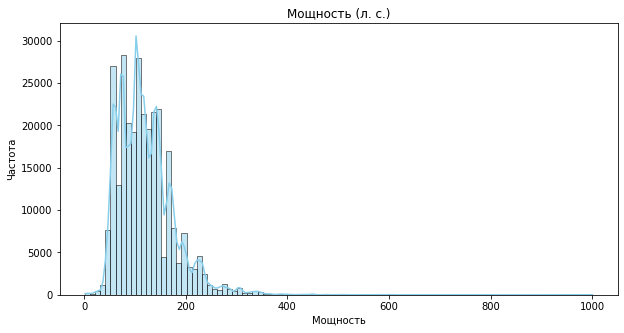

In [35]:
plt.figure(figsize=(10, 5))
sns.histplot(selected_autos['power'], bins=100, kde=True, color='skyblue')
plt.title(f'Мощность (л. с.)')
plt.xlabel('Мощность')
plt.ylabel('Частота')
plt.show()

По данному графику видно, что значения большие 400 крайне редкие, поэтому пусть 400 будет максимальным

In [36]:
selected_autos = selected_autos.query('power < 401')
selected_autos['power'].describe()

count    291260.000000
mean        120.542776
std          52.702640
min           2.000000
25%          77.000000
50%         113.000000
75%         150.000000
max         400.000000
Name: power, dtype: float64

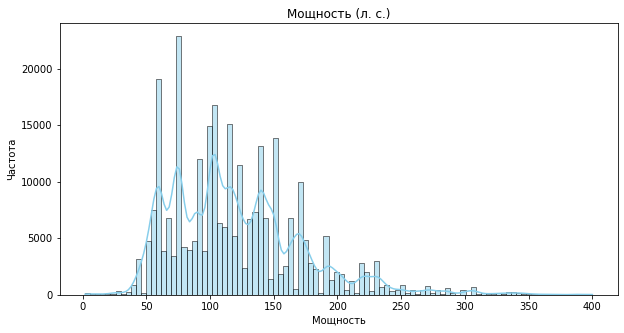

In [37]:
plt.figure(figsize=(10, 5))
sns.histplot(selected_autos['power'], bins=100, kde=True, color='skyblue')
plt.title(f'Мощность (л. с.)')
plt.xlabel('Мощность')
plt.ylabel('Частота')
plt.show()

Теперь посмотрим на ящик с усами

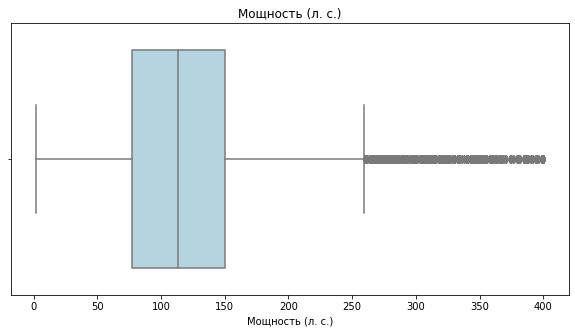

In [38]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=selected_autos['power'], color='lightblue')
plt.title(f'Мощность (л. с.)')
plt.xlabel(f'Мощность (л. с.)')
plt.show()

Среднее значение - 120, медиана - 110. Наблюдаются выбросы за пределами 3 квантиля(тк эти значения редкие)

<div class="alert alert-warning">
<h3> Комментарий ревьюера <a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> У мощности очень много нулевых значений, которые в данном случае очень похожи на неявные пропуски, их можно попробовать восстановить на основе других характеристик авто, поскольку они могут быть взаимосвязаны.

<div class="alert alert-warning">
<h3> Комментарий ревьюера 2<a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> Исходно в мощности у нас не было пропусков, только неявные, замаскированные нулями. Поэтому их сначала нужно было заменить на пропуски и только потом использовать `fillna`.

**Рассмотрим признак Kilometer**

In [39]:
selected_autos['kilometer'].describe()

count    291260.000000
mean     128163.891369
std       36823.758320
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: kilometer, dtype: float64

В столбце kilometer наблюдается 296066 значений. mean: средний пробег автомобиля составляет примерно 128297 км. std: стандартное отклонение, равное 36760, указывает на значительное разнообразие пробегов. min: минимальный пробег составляет 5000 км. max: максимальный пробег составляет 150000 км, что указывает на наличие автомобилей с одинаковым максимальным пробегом.

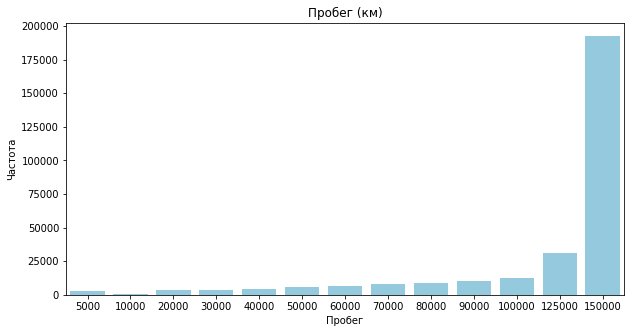

In [40]:
plt.figure(figsize=(10, 5))
sns.countplot(data=selected_autos, x='kilometer', color='skyblue')
plt.title('Пробег (км)')
plt.xlabel('Пробег')
plt.ylabel('Частота')
plt.show()

По данной таблице видим, что самое частое значение 150000, кроме того, заметно, что чем больше пробег, тем чаще встречается это значение

Также рассмотрим диаграмму рассеяния, чтобы оценить выбросы

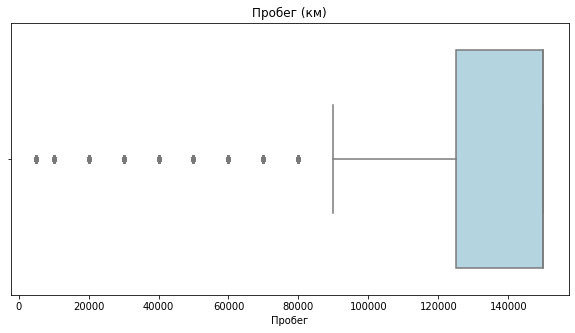

In [41]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=selected_autos['kilometer'], color='lightblue')
plt.title(f'Пробег (км)')
plt.xlabel(f'Пробег')
plt.show()

Из-за того, что значения меньшие 90000 встречаются реже они являются выбросами

In [42]:
selected_autos.columns

Index(['price', 'vehicle_type', 'registration_year', 'gearbox', 'power',
       'model', 'kilometer', 'registration_month', 'fuel_type', 'brand',
       'repaired'],
      dtype='object')

Рассмотрим теперь категориальные признаки 'vehicle_type', 'gearbox', 'fuel_type', 'repaired'

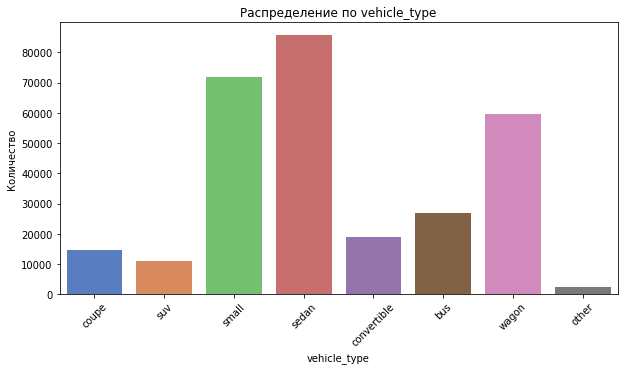

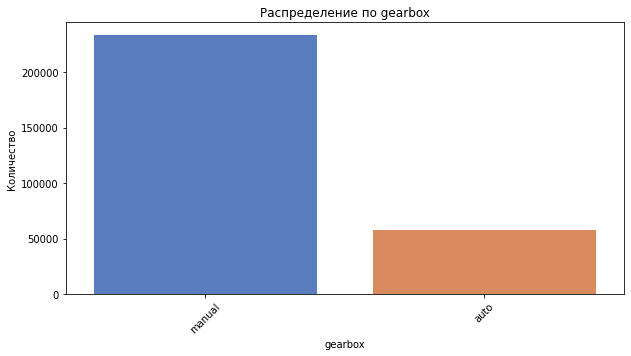

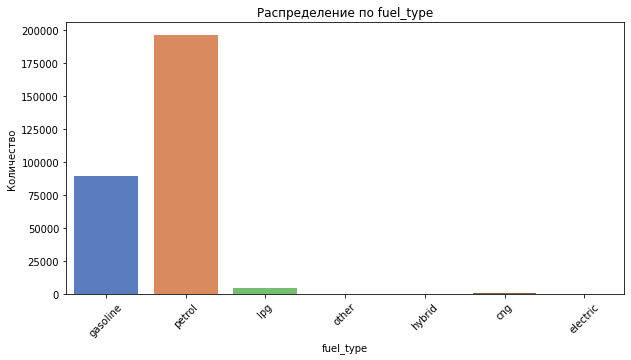

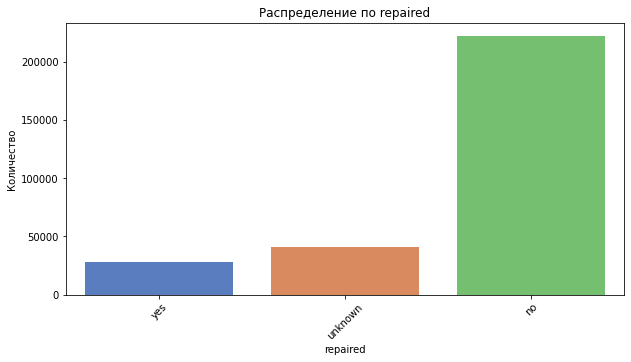

In [43]:
categorical_features = ['vehicle_type', 'gearbox', 'fuel_type', 'repaired']
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=selected_autos, x=feature, palette='muted')
    plt.title(f'Распределение по {feature}')
    plt.xlabel(feature)
    plt.ylabel('Количество')
    plt.xticks(rotation=45)
    plt.show()

In [44]:
selected_autos['fuel_type'].value_counts()

petrol      196337
gasoline     89454
lpg           4633
cng            476
hybrid         199
other           88
electric        73
Name: fuel_type, dtype: int64

- В столбце vehicle_type наиболее частыми значениями являются: sedan, small, wagon. Наименее распространенные: other, suv, coupe.
- В столбце gearbox чаще всего встречается значение manual
- В столбце fuel_type наиболее распространенные значения: petrol, gasoline, lpg. Наименее распространенные: hybrid, other, electric
- По столбцу repaired видим, что как правило машину не отдавали в ремонт

Отдельно рассмотрим столбцы model, brand, тк в них достаточно много значений.

In [45]:
selected_autos['model'].nunique()

250

Всего 250 уникальных моделей

In [46]:
selected_autos['brand'].nunique()

40

In [47]:
selected_autos['brand'].value_counts()

volkswagen        62711
bmw               31925
opel              31778
mercedes_benz     26974
audi              25203
ford              20324
renault           13652
peugeot            9277
fiat               7525
seat               5746
skoda              4898
mazda              4646
smart              4430
citroen            4187
nissan             3989
toyota             3974
hyundai            3085
mini               2943
volvo              2799
mitsubishi         2451
honda              2323
kia                2063
alfa_romeo         1943
suzuki             1929
sonstige_autos     1775
chevrolet          1433
chrysler           1150
dacia               791
subaru              637
daihatsu            604
porsche             579
jeep                565
saab                473
land_rover          463
jaguar              437
daewoo              402
lancia              376
rover               356
trabant             288
lada                156
Name: brand, dtype: int64

Всего 40 уникальных брендов. Наиболее распространенные: volkswagen, opel, bmw. Наименее распространенные: rover,  trabant, lada. 

Выполним также корреляционный анализ, будем использовать матрицу корреляции phik, тк в наших данных присутствуют и количественные и категориальные признаки

In [48]:
selected_autos.columns

Index(['price', 'vehicle_type', 'registration_year', 'gearbox', 'power',
       'model', 'kilometer', 'registration_month', 'fuel_type', 'brand',
       'repaired'],
      dtype='object')

In [49]:
#Отберем только непрерывные признаки
quantitative_features = ['price', 'registration_year', 'power']

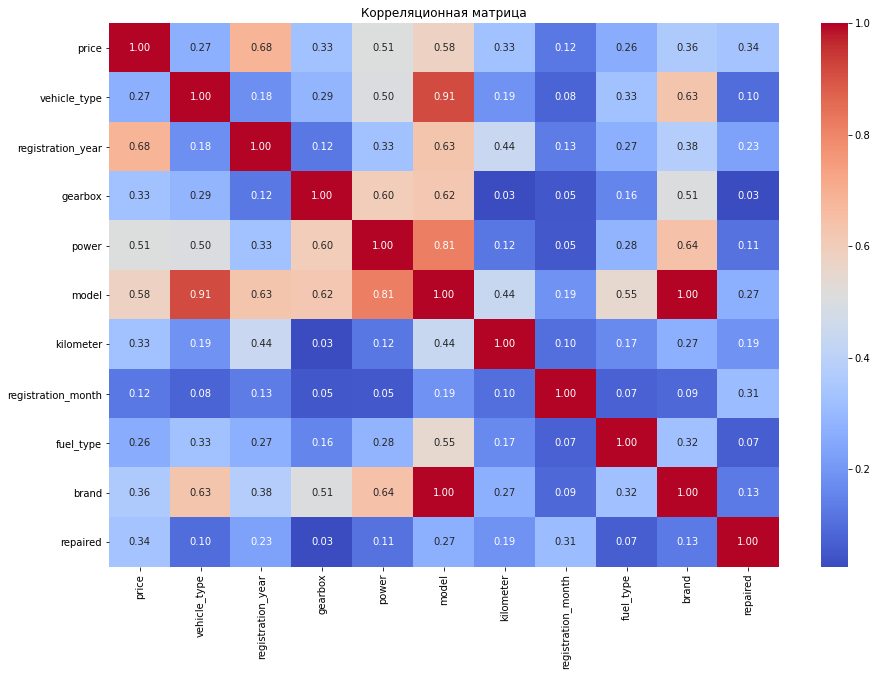

In [50]:
# Рассчет корреляционной матрицы
correlation_matrix = selected_autos.phik_matrix(interval_cols=quantitative_features)

# Визуализация корреляционной матрицы
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица')
plt.show()

По данной матрице корреляции можно заметить, что высокая корреляция наблюдается у признаков model-power(0.81); заметная корреляция наблюдается у признаков: registration_year-price(0.67), model-price(0.58), brand-vehicle_type(0.63), power-vehicle_type(0.5), model-registration_year(0.63), brand-gearbox(0.51), model-gearbox(0.62), power-gearbox(0.6), power-brand(0.64), fuel_type-model(0.55). Мультиколлинеарность принято учитывать при корреляции признаков выше 0.9, поэтому мультиколлинеарность наблюдается у признаков vehicle_type-model(0.92). Поэтому при обучении модели важно учитывать этот факт

Признак brand сильно коррелирует с признаком model.
Так как model полностью определяет brand (каждая модель уникально относится к бренду), наличие обоих признаков в данных создает мультиколлинеарность.
Это усложняет интерпретацию модели, увеличивает время обучения,
может ухудшать качество предсказаний.
Поэтому признак brand следует удалить из датасета.

In [51]:
selected_autos = selected_autos.drop(columns=['brand'])

На данном шаге были выполнены следующие шаги:

- Загрузка и подготовка данных
- Подготовка выборки для обучения моделей
- Провели корреляционный анализ

<div class="alert alert-warning">
<h3> Комментарий ревьюера<a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
* Относительно явления мультиколоинеарности (скоррелированности признаков между собой). Она является проблемой в случаях интерпретации важности или степени влияния признака на таргет (скоррелированные признаки оказывают на таргет схожий между собой эффект - то есть объяснятся примерно одна и та же вариация таргета - из-за чего и оценка этого влияния размазывается между этими признаками, то есть сам по себе эффект может быть значительным, но из-за того, что распределен между несколькими признаками, они могут начать проигрывать в рейтинге самых влияетельных факторов). Кроме того, наличие мультиколлинеарности приводит к увеличению вычислительной сложности модели - в совокупности с малой дополнительно приносимой пользой (редко признаки скорредированы на все 100%, что-то индивидуально они все же тоже привносят) это может быть существенным минусом, когда время работы модели играет не последнюю роль - наш случай. Поэтому можно задуматься о том, чтобы побороться с мультиколлинеарностью.
    
    
* Обрати внимание на пару модель-бренд. Бренд нам сообщает только бренд авто, а вот по модели мы можем понять и бренд, и какие-то прочие характеристики, специфичные для конкретной модели. Поэтому бренд просто дублирует информацию, которую мы можем понять и по модели.

Удалила столбец brand

<div class="alert alert-success">
<h3> Комментарий ревьюера 2<a class="tocSkip"> </h3> 
    
<b>Все отлично! 👍:</b> 😉

## Обучение моделей

Сначала подготовим данные для обучения, для этого выполним One-Hot Encoding и масштабирование данных

In [52]:
X = selected_autos.drop(columns='price', axis=1)
y = selected_autos['price']

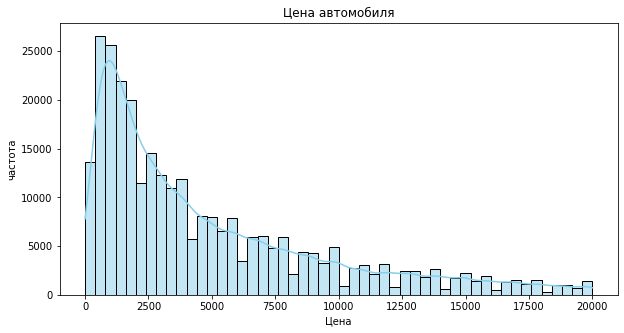

In [53]:
plt.figure(figsize=(10, 5))
sns.histplot(selected_autos['price'], bins=50, kde=True, color='skyblue')
plt.title('Цена автомобиля')
plt.xlabel('Цена')
plt.ylabel('частота')
plt.show()

В нашем случае целевой признак - непрерывная величина, стратифицирование не потребуется

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [55]:
print('Размерность выборки X_train: ', X_train.shape)
print('Размерность выборки X_test: ', X_test.shape)
print('Размерность выборки y_train: ', y_train.shape)
print('Размерность выборки y_test: ', y_test.shape)

Размерность выборки X_train:  (218445, 9)
Размерность выборки X_test:  (72815, 9)
Размерность выборки y_train:  (218445,)
Размерность выборки y_test:  (72815,)


В наших данных отсутствуют ранговые и порядковые признаки, поэтому OrdinalEncoder не потребуется. Для One-Hot Encoding выберем столбцы 'vehicle_type', 'gearbox', 'model', 'fuel_type', 'repaired'. Остальные признаки - числовые. Также стоит учесть, что в столбце 'model' всего 250 значений, поэтому при обучении Random Forest Regressor и LightGBM это стоит учитывать

In [56]:
cat_columns = ['vehicle_type', 'model', 'gearbox', 'fuel_type', 'repaired']
num_columns = ['power', 'registration_year', 'registration_month', 'kilometer']

In [57]:
#пайплайн для OneHotEncoder
ohe_pipe = Pipeline([
    (
        'ohe',
        OneHotEncoder(
            drop='first',
            sparse_output=False,
            handle_unknown='ignore'
        )
    )
])

In [58]:
# Пайплайн TargetEncoder для высококардинального
target_encoder_pipe = Pipeline([
    ('target_encoder', TargetEncoder())
])

Для обучения будем использовать следующие модели:

1) Linear Regression

Плюсы:

- Простота и интерпретируемость
- Быстрое обучение
Работает очень быстро даже на больших датасетах.
Минимальные требования к вычислительным ресурсам.

Минусы:

- Линейность
Линейная регрессия предполагает, что зависимость между признаками и целевой переменной линейная.
Если в данных есть нелинейные зависимости, качество может быть низким.

- Чувствительность к мультиколлинеарности
Сильно страдает, если признаки сильно коррелированы между собой.
Коэффициенты становятся нестабильными.

- Чувствительность к выбросам
Несколько экстремальных значений могут сильно исказить модель.


2) Random Forest Regressor

Плюсы Decision Tree:
* Модель быстро обучается.
* Модель легко интерпретируется (можно визуализировать дерево).
* Хорошо справляется с нелинейными зависимостями.

Возможные риски:
* DecisionTreeRegressor склонен переобучаться, особенно без ограничения глубины (max_depth).
* Может показывать высокую ошибку на новых данных, если не использовать настройку гиперпараметров.

3) LightGBM

<div class="alert alert-success">
<h3> Комментарий ревьюера <a class="tocSkip"> </h3> 

<b>Все отлично! 👍:</b> 
    
* Относительно масштабирования. На качество деревянных моделей (дерево, лес, XGBoost, LGBM, CatBoost), на самом деле, оно не окажет никакого влияния, поскольку принцип принятия решения завязан на относительности значений признаков (больше/меньше), а она при масштабировании воздействию не подвергается. Однако масштабирование может немного повлиять на производительность. Но при этом масштабирование важно для методов, основанных на дистанции (KNN, SVM, кластеризация) или вариации (PCA).
    
    С линейными регрессиями чуть интереснее. На **простой** линейной регрессии масштабирование, в теории, не окажет никакого влияния на предсказания (однако есть оговорки). Но в некоторых случаях оно все же необходимо.

    <details> <summary> <span style='color:blue' > Развернуть подробнее. </span> </summary>
    
    Если мы посмотрим на линейное уравнение модели, парметры которого мы оцениваем в процессе обучения, то заметим, что масштабирование никак себя не проявит, поскольку все изменения переменной  просто уйдут в новые коэффициенты:    
    
    $y = \alpha + \beta x$ - без масштабирования
    _____________________________________________________________________________________________________________________
    
    $y = \alpha_{st} + \beta_{st} \frac{x-mean}{std} = (\alpha_{st} - \frac{\beta_{st}mean}{std}) + (\frac{\beta_{st}}{std}) x$ - со стандартизацией
    
    При этом $\alpha = (\alpha_{st} - \frac{\beta_{st}mean}{std})$ и $\beta = (\frac{\beta_{st}}{std})$
    _____________________________________________________________________________________________________________________
    
    $y = \alpha_{mm} + \beta_{mm} \frac{x-min}{max-min} = (\alpha_{mm} - \frac{\beta_{mm}min}{max-min}) + (\frac{\beta_{mm}}{max-min}) x$ - с нормализацией
    
    При этом $\alpha = (\alpha_{mm} - \frac{\beta_{mm}min}{max-min})$ и $\beta = (\frac{\beta_{mm}}{max-min})$
    _____________________________________________________________________________________________________________________
    
    Когда же тогда масштабирование необходимо для линейной модели? Ссылки для ознакомления: <a href = 'https://www.listendata.com/2017/04/how-to-standardize-variable-in-regression.html'>тык</a>, <a href = 'https://www.dmitrymakarov.ru/learning/reg/#8-regulyarizatsiya-lineynoy-regressii'>тык</a>. Если кратко резюмировать, то пункты следующие:
        
    * **Линейные модели с регуляризацией (Ridge, Lasso, Elastic Net)**. Данные модели регулируют те самые коэффициенты, поэтому важно, чтобы масштаб не приводил к тому, что признаки с маленькими значениями будут штафоваться больше (их коэффициенты больше), чем признаки с большими значениями (их коэффициенты меньше). Для Lasso иногда стандартизируют даже бинарные признаки (получаем после OHE), чтобы абсолютно все признаки были в равных условиях. Или же при стандартизации числовых признаков вместно одного стандартного отклонения делят на два, тогда мы получаем примерно равный масштаб с бинарными признаками. Однако острой необходимости в этом нет. 
        
    * **Интерпретация важности признаков.** Сравнивать коэффициенты регрессии по степени влияния на таргет мы можем, только если коэффициенты избавлены от масштаба и приведены к абсолютным значениям.
    
    * **Разница в масштабах признаков слишком большая.** Мы не можем хранить полностью бесконечные дробные части, поэтому при вычислениях используется некоторое округление. Но из-за того, что признаки имеют слишком разный масштаб, будут сильно различаться и коэффициенты, а значит много чего будет уходить в дробную часть, которую мы частично теряем, начинает страдать точность. Как правило, проблема становится ощутимой, когда разница в масштабах достигает $10^6$.
        
    * **Используем алгоритм обучения через градиентный спуск (SGD, нейронные сети).** При равномасштабных признаках линии уровня функции потерь имеют округлую форму (вместо элипса при разном масштабе), поэтому алгоритм быстрее и точнее сходится к минимуму (спуск более прямой, а не зигзагообразный).
        
    * **Используем степени признака (полином) или произведение пары признаков.** Иначе может появляться мультиколлинеарность, что приводит к нестабильности коэффициентов. 
    
  </details>
    
    
* Верно, что при проведении <a href = 'https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html'>OHE</a> кодирования не забываем про настройку `drop='first'`. Про мультиколлинеарность выше уже говорила, здесь чуть дополню. Создание дамми-признаков для низкокардинальных категориальных признаков также приводит к мультиколлинеарности, чем меньше категорий - тем сильнее (при 2 категориях корреляция между двумя дамми-признаками будет равна 1). Исходя из этих соображений, принято отбрасывать один из дамми признаков, который по сути довольно просто выражается через все остальные.

<div class="alert alert-warning">
<h3> Комментарий ревьюера <a class="tocSkip"> </h3>

<b>Некоторые замечания и рекомендации💡:</b> 
    
    
* Сейчас выбор кодирования не совсем рационален для моделей на основе деревьев. Для эффективной работы моделей и получения качественных результатов подход необходимо выбирать с учетом модели. Какое кодирование когда выбирать?
<details> <summary> <span style='color:blue' > Развернуть подробнее. </span> </summary>

    1. Для линейных моделей (простых, с регуляризацией, с различной реализацией алгоритма обучения - bayesian или sgdr) допустимо только кодировние <a href = 'https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html'>OHE</a> (если категории не имеют порядка). Если применить порядковое кодирование к тем категориям, которые этого порядка по сути не имеют, то модель едва ли сможет нормально оценить влияние данного признака, поскольку будет искать линейную взаимосвязь там, где ее не подразумевается. По итогу признак становится бесполезным.

    2. Для простых деревьев, лесов и XGBoost в случае, когда уникальных категорий немного (низкокардинальный признак), можно тоже применять OHE. Однако если признак высококардинальный (много уникальных категорий) от него лучше воздержаться. В отличие от линейной регрессии для достижения хорошей точности в этом случае необходимо растить очень глубокое дерево, что достаточно ресурсозатратно. По этой причине такие деревья часто остаются недообученными и несбалансированными. Для высококардинальных признаков вместо OHE лучшим вариантом будет считаться <a href='https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.TargetEncoder.html'>TargetEncoder</a> (о нем ниже). Но также допускается и использование порядкового кодирования, хотя качество модели будет ниже.

    3. Самым оптимальным решением в случае LGBM и CatBoost будет использование встроенных кодировщиков (TargetEncoder у LGBM и собственный кодировщик на базе TargetEncoding у CatBoost). Чтобы ими воспользоваться, мы можем указать список категориальных признаков в спициальном параметре (`categorical_feature` для LGBM, указывается в методе `fit` после обучающих данных, и `cat_features` для CatBoost, указывается в самой модели). Однако LGBM требует, чтобы категориальные признаки были переведены в тип `category`. Если среди признаков, которые мы хотим закодировать, нет тех, что представлены числами, то в целом можно даже не задавать параметр со списком явно, модели могут сами определить, что требуется кодирование.

    4. Модель ближайщих соседей может стерпеть OHE, если категорий немного, однако лучше использовать Target encoding. Порядковое кодирование без существавания явной упорядоченности не подойдет.

  Теперь про <a href='https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.TargetEncoder.html'>TargetEncoder</a> (доступен, начиная с версии 1.3). Данный подход требует регуляризации, чтобы избежать утечки данных - нарочного подстраивания зависимости таргета от признака - и переобучения. В алгоритме sklearn реализованы следующие методы регуляризации: (1) smoothing - взвешивание среднего значения по группе с глобальным средним (регулирется через параметр), (2) cross fitting - разбивает группу на фолды, для подсчета среднего использует все фолды кроме текущего. Однако второй подход реализуется только при использовании метода `fit_transform` (для трейна, на тесте просто `transform`), при отдельном вызове `fit` и `transform` средние будут считаться для всей группы сразу (подробнее <a href='https://scikit-learn.org/stable/auto_examples/preprocessing/plot_target_encoder_cross_val.html#target-encoder-s-internal-cross-fitting'>тут</a>). Поэтому, во избежание ошибок и утечек, в особенности при проведении кросс-валидации, данное кодирование необходимо реализовывать через пайплайн.

  Иногда бывает, что при выполнении регуляризации в рамках TE мы попадаемся на не очень удачный сплит, когда категорий меньше, чем сплитов, что приводит к ошибке. Можно тогда попробовать TE не из scklearn, а из библиотеки <a href='https://contrib.scikit-learn.org/category_encoders/targetencoder.html'>category_encoders</a>, там алгоритм чуть доработанный. Или же аналог кодирования <a href='https://contrib.scikit-learn.org/category_encoders/catboost.html'>CatBoost</a> из этой же библиотеки.


* В использовании пайплайнов теряется смысл, если трансформацию данных производить вне кросс-валидационного процесса, разве что код структурнее выглядит, но все так же продолжают создаваться утечки из будущих валидационных фолдов в обучающие.

<div class="alert alert-warning">
<h3> Комментарий ревьюера 2<a class="tocSkip"> </h3>

<b>Некоторые замечания и рекомендации💡:</b> На будущее, месяц регистрации по сути тоже является категориальным признаком, поэтому для линейной регрессии его стоило бы кодировать. В данном проекте это можно не делать, поскольку мы предполагаем, что чем моложе авто, тем оно дороже, а значит авто с регистрацией в начале года будет стоить дешевле, чем с регистрацией в конце года, то есть взаимосвязь линейная. Для сравнение, кодирование бы требовалось обязательно, если бы мы предполагали наличие какого-то сезонного влияния, в таком случае взаимосвязь уже нелинейная, и ее необходимо моделировать иначе.

**Linear Regression**

Сначала обучим модель линейной регрессии
Будем использовать кросс-валидацию, чтобы оценить качество моделей

In [59]:
lr_preprocessor = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_columns),
    ('num', StandardScaler(), num_columns)
])

In [60]:
# Линейная регрессия
lr_pipeline = Pipeline([
    ('preprocessing', lr_preprocessor),
    ('regressor', LinearRegression())
])

In [61]:
lr_results = cross_validate(
    lr_pipeline,
    X_train,
    y_train,
    cv=5,
    scoring='neg_mean_squared_error',
    return_train_score=True,
    n_jobs=-1
)

rmse_lr = np.mean(np.sqrt(-lr_results['test_score']))
fit_time_lr = np.mean(lr_results['fit_time'])
score_time_lr = np.mean(lr_results['score_time'])

print(f"LinearRegression RMSE: {rmse_lr:.3f}")
print(f"Среднее время обучения: {fit_time_lr:.3f} сек")
print(f"Среднее время предсказания: {score_time_lr:.3f} сек")

LinearRegression RMSE: 2588.378
Среднее время обучения: 17.661 сек
Среднее время предсказания: 0.200 сек


Чем меньше RMSE — тем лучше. В нашем случае RMSE ≈ 2588 говорит, что в среднем модель ошибается на ~2588 евро при предсказании цены автомобиля. Это может говорить о наличии нелинейных зависимостей и
важности взаимодействий признаков. Необходимо чтобы RMSE было меньше 2500.


Среднее время обучения: 25.327 сек
Линейная регрессия считается быстрой, но так как у нас достаточно много признаков, то обучение занимает больше времени.

Среднее время предсказания: 0.235 сек
Предсказание по линейной модели обычно очень быстрое.


**Random Forest Regressor**

Тк в наших данных присутсвуют высококардинальные признаки необходимо это учесть, поэтому в этом случае добавим порядковое кодирование для признака 'model'

In [62]:
low_card_columns = ['vehicle_type', 'gearbox', 'fuel_type', 'repaired']
high_card_cols = ['model']

In [63]:
# Модель дерева решений
high_card_pipeline = Pipeline([
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])


low_card_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

rf_preprocessor = ColumnTransformer(
    transformers=[
        ('high_card', high_card_pipeline, high_card_cols),
        ('low_card', low_card_pipeline, low_card_columns),
        ('num', num_pipeline, num_columns)
    ],
    remainder='drop'
)

In [64]:
# Пайплайн с моделью
rf_pipeline = Pipeline([
    ('preprocessor', rf_preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Кросс-валидация
rf_results = cross_validate(
    rf_pipeline,
    X_train,
    y_train,
    cv=5,
    scoring='neg_mean_squared_error',
    return_train_score=True,
    n_jobs=-1
)

rmse_rf = np.mean(np.sqrt(-rf_results['test_score']))
fit_time_rf = np.mean(rf_results['fit_time'])
score_time_rf = np.mean(rf_results['score_time'])

print(f"RandomForestRegressor RMSE: {rmse_rf:.3f}")
print(f"Среднее время обучения: {fit_time_rf:.3f} сек")
print(f"Среднее время предсказания: {score_time_rf:.3f} сек")


RandomForestRegressor RMSE: 1626.804
Среднее время обучения: 87.473 сек
Среднее время предсказания: 2.532 сек


Среднее RMSE на кросс-валидации: ~1626.804

Требования: RMSE < 2500

Значение 1626.804 существенно ниже порогового. Это значит, что качество модели соответствует норме. RMSE указывает на то, что средняя ошибка прогноза составляет примерно 1626.804 евро.



Среднее время обучения: 84.820 сек
Обучение RandomForest обычно более затратное по времени, чем линейной модели.
Вывод по времени обучения:

~1.5 минуты 

Среднее время предсказания: 2.495 сек
Здесь видим, что предсказания занимают почти 10 раз больше времени, чем у линейной регрессии.


Проверим как улучшит качество подбор гиперпараметров

In [65]:
# Параметры для RandomForestRegressor
param_grid = {
    "model__max_depth": [10, None],
    "model__min_samples_split": [2, 10],
    "model__min_samples_leaf": [2, 4]
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_pipeline,        
    param_grid=param_grid,
    cv=3,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

# Лучшие параметры
print("Лучшие гиперпараметры:", grid_search.best_params_)

# RMSE по кросс-валидации
best_rmse = (-grid_search.best_score_) ** 0.5
print(f"Лучший RMSE (CV): {best_rmse:.3f}")

# время обучения финальной лучшей модели на всех данных
refit_time = grid_search.refit_time_
print(f"Время обучения лучшей модели (refit_time_): {refit_time:.2f} секунд")



Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END model__max_depth=10, model__min_samples_leaf=2, model__min_samples_split=2; total time=  40.6s
[CV] END model__max_depth=10, model__min_samples_leaf=2, model__min_samples_split=2; total time=  40.8s
[CV] END model__max_depth=10, model__min_samples_leaf=2, model__min_samples_split=2; total time=  42.6s
[CV] END model__max_depth=10, model__min_samples_leaf=2, model__min_samples_split=10; total time=  46.2s
[CV] END model__max_depth=10, model__min_samples_leaf=2, model__min_samples_split=10; total time=  44.4s
[CV] END model__max_depth=10, model__min_samples_leaf=2, model__min_samples_split=10; total time=  43.2s
[CV] END model__max_depth=10, model__min_samples_leaf=4, model__min_samples_split=2; total time=  46.1s
[CV] END model__max_depth=10, model__min_samples_leaf=4, model__min_samples_split=2; total time=  43.6s
[CV] END model__max_depth=10, model__min_samples_leaf=4, model__min_samples_split=2; total time=  36.2s
[

In [66]:
refit_time = grid_search.refit_time_
print(f"Время обучения финальной модели (refit_time_): {refit_time:.2f} секунд")


Время обучения финальной модели (refit_time_): 108.43 секунд


Как видим подбор гиперпараметров незначительно ухудшило качество модели

**Выводы по DecisionTreeRegressor:**

Модель с наилучшим качеством (по RMSE на кросс-валидации):
- DecisionTreeRegressor с параметрами:
- max_depth = None — дерево не ограничено по глубине.
- min_samples_split = 2 — разбиение узла происходит, если в нём как минимум 10 объектов.
- min_samples_leaf = 2 — в листе должно быть минимум 4 объекта.

- Среднее RMSE на кросс-валидации: ~1629.498
- Требования: RMSE < 2500

Значение 1629.498 существенно ниже порогового.
Это значит, что качество модели соответствует норме.
RMSE указывает на то, что средняя ошибка прогноза составляет примерно 1629.498 евро.

Таким образом, DecisionTreeRegressor уже даёт приемлемое качество, и его можно использовать для обучения нашей модели.

Время обучения:

Без подбора гиперпараметров: ~73.046 сек

С подбором гиперпараметров: ~92.15 секунд


Поэтому в этом случае подбор гиперпараметров ухудшает работу модели

**LightGBM**

Тк в наших данных присутсвуют высококардинальные признаки необходимо это учесть, поэтому самым оптимальным решением в случае LGBM будет использование встроенных кодировщиков

In [67]:
X_train_lgb = X_train.copy()
for col in cat_columns:
    X_train_lgb[col] = X_train_lgb[col].astype('category')


In [68]:
lgb_model = LGBMRegressor(random_state=42)

def lgb_cv():
    scores = cross_validate(
        lgb_model,
        X_train_lgb,
        y_train,
        cv=5,
        scoring='neg_mean_squared_error',
        return_train_score=True,
        n_jobs=-1
    )
    return scores

lgb_results = lgb_cv()

In [69]:
rmse_lgb = np.mean(np.sqrt(-lgb_results['test_score']))
fit_time_lgb = np.mean(lgb_results['fit_time'])
score_time_lgb = np.mean(lgb_results['score_time'])

print(f"LightGBM RMSE: {rmse_lgb:.3f}")
print(f"Среднее время обучения: {fit_time_lgb:.3f} сек")
print(f"Среднее время предсказания: {score_time_lgb:.3f} сек")

LightGBM RMSE: 1615.471
Среднее время обучения: 10.189 сек
Среднее время предсказания: 0.502 сек


Эти показатели лучше, чем у DecisionTreeRegressor

Посмотрим улучшатся ли показатели если использовать подбор гиперпараметров

In [70]:
param_grid = {
    "num_leaves": [31, 50, 100],
    "learning_rate": [0.1, 0.05]
}

grid_search = GridSearchCV(
    estimator=lgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_lgb, y_train, categorical_feature=cat_columns)

print("Лучшие параметры:", grid_search.best_params_)
best_rmse = (-grid_search.best_score_) ** 0.5
print(f"Лучший RMSE (CV): {best_rmse:.3f}")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ...................learning_rate=0.1, num_leaves=31; total time=   6.7s
[CV] END ...................learning_rate=0.1, num_leaves=31; total time=   4.8s
[CV] END ...................learning_rate=0.1, num_leaves=31; total time=   4.8s
[CV] END ...................learning_rate=0.1, num_leaves=31; total time=   4.9s
[CV] END ...................learning_rate=0.1, num_leaves=31; total time=   4.4s
[CV] END ...................learning_rate=0.1, num_leaves=50; total time=   6.3s
[CV] END ...................learning_rate=0.1, num_leaves=50; total time=   5.8s
[CV] END ...................learning_rate=0.1, num_leaves=50; total time=   8.0s
[CV] END ...................learning_rate=0.1, num_leaves=50; total time=   5.6s
[CV] END ...................learning_rate=0.1, num_leaves=50; total time=   5.8s
[CV] END ..................learning_rate=0.1, num_leaves=100; total time=  10.3s
[CV] END ..................learning_rate=0.1, num

In [71]:
refit_time = grid_search.refit_time_
print(f"Время обучения финальной модели (refit_time_): {refit_time:.2f} секунд")


Время обучения финальной модели (refit_time_): 8.70 секунд


Подбор гиперпараметров значительно улучшил качество модели

Выводы по LightGBM:

Подобранные гиперпараметры:
- learning_rate: 0.1
- num_leaves: 100
Много листьев, поэтому более гибкая, что помогает выявлять сложные зависимости.

Качество модели: ~1560.732
В среднем, предсказания LightGBM ошибаются на ~1560.732 единиц цены автомобиля.

Время обучения: 
7.48 секунд
LightGBM перебирал сетку параметров (всего 30 обучений)
Для каждой комбинации делалась 5-кратная кросс-валидация.

## Анализ моделей

Нужно учитывать следующие критерии заказчика:

- качество предсказания;
- время обучения модели;
- время предсказания модели

А также значение метрики RMSE должно быть меньше 2500.

Для обучения мы использовали следующие модели:

- Linear Regression
- Decision Tree 
- LightGBM

Краткие выводы по моделям:

- Качество предсказания (RMSE)
LightGBM имеет наилучший результат (RMSE ~1597).
Decision Tree чуть хуже (RMSE ~1747).
Linear Regression гораздо хуже (RMSE ~2617).
- Время обучения модели
Linear Regression быстрее всех (3 мин).
Decision Tree и LightGBM сопоставимы (~29–30 мин).
Разница между деревом и LightGBM в обучении незначительная.


Так как качество предсказания — ключевой критерий, а разница по времени обучения между Decision Tree и LightGBM небольшая, оптимальным вариантом будет LightGBM.

<div class="alert alert-block alert-danger">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
    
<b>На доработку🤔:</b>


* Вместо времени обучения ты сейчас замеряешь время подбора гиперпараметров (или время проведения кросс-валидации), которое включает в себя и время обучения, и время предсказания, еще и на нескольких фолдах кросс-валидации, для нескольких наборов параметров (в случае их перебора). Такое время мы не можем использовать для сравнения моделей между собой, поскольку в большей степени оно зависит от количества фолдов и наборов параметров.
    
    
* Модель может быть быстрой в обучении, но очень медленной при предсказании, и наоборот. Время предсказания при этом часто может быть даже приоритетнее, поскольку актуализировать модель необходимо только периодически, а применять ее нужно регулярно. Поэтому необходимо рассмотреть оба данных показателя по отедльности, чтобы принять взвешенное решение.

<div class="alert alert-success">
<h3> Комментарий ревьюера 2<a class="tocSkip"> </h3> 
    
<b>Все отлично! 👍:</b> 😉

<div class="alert alert-warning">
<h3> Комментарий ревьюера <a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
* Если используешь для модели Grid или RandomizedSearchCV, то из него сразу можно достать метрику лучшей модели (`.best_score_`), среднее время обучения (`mean_fit_time`) и оценки (`mean_score_time`) лучшей модели. Пример кода: `grid_cv.cv_results_['mean_fit_time'][grid_cv.best_index_]`. Однако следует уточнить, что mean_score_time включает не только время получения предсказаний, но и расчет метрики, но в нашем случае это допустимо. Как вариант, можно еще получить время обучения лучшей модели на всем тренировочном наборе через `.refit_time_`. 

    Если подбор параметров не производится, то можно провести кросс-валидацию с помощью <a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html'>cross_validate</a>, который по аналогии с гридсерчем помимо скоров на каждом сплите также логирует время обучения и время получения скора. Из получаемого словаря берем `'fit_time'`, `'score_time'` и `'test_score'` и усредняем их значения.
 
    Однако в таком случае следим, чтобы параметр `cv` был одинаковым, чтобы показатели были сопоставимы.
 
        
* Для более удобного сравнения результаты лучше сложить в таблицу.


* Вместо ручного копи-паста результатов в таблицу, лучше сохранять показатели в переменные, а затем использовать их для заполнения таблицы, иначе придется не забывать каждый раз вносить корректировки, плюс не исключен человеческий фактор.

<div class="alert alert-warning">
<h3> Комментарий ревьюера 2<a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> Обрати внимание, что `.refit_time_` не совсем корректно сравнивать со средним времнем обучения в процессе кросс-валидации, поскольку отличается размер выборки, при этом формат оценки отличается, кросс-валидационная - это сбалансированное среднее между несколькими замерами, а `.refit_time_` - одноразовый замер.

In [72]:
X_test_lgb = X_test.copy()
for col in cat_columns:
    X_test_lgb[col] = pd.Categorical(X_test_lgb[col], categories=X_train_lgb[col].cat.categories)

best_lightgbm = grid_search.best_estimator_

# Засекаем время предсказания
start_time = time.time()

# Делаем предсказание на тестовых данных
y_pred = best_lightgbm.predict(X_test_lgb)

end_time = time.time()
prediction_time = end_time - start_time

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f"RMSE на тестовой выборке: {rmse:.2f}")
print(f"Время предсказания: {prediction_time:.4f} секунд")

RMSE на тестовой выборке: 1549.05
Время предсказания: 0.9772 секунд


Качество предсказания: RMSE = 1549.05
Это лучше, чем кросс-валидационный RMSE (1560.732), что абсолютно нормально: после переобучения на всех данных модель предсказывает чуть лучше.
Вывод: Модель демонстрирует стабильное и высокое качество.

Время предсказания: Всего ~0.9616 секунд 
Это быстро и вполне подходит под требуемые критерии.


<div class="alert alert-warning">
<h3> Комментарий ревьюера <a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> Дополнительно на этапе тестирования также имеет смысл визуально сравнить предсказания с истиной (график рассеяния таргета и предсказаний, график ошибок), чтобы лучше предстваить, чего же мы в итоге достигли. Можно изучить важность признаков (помним про мультиколлинеарность).

<div class="alert alert-success">
<h3> Комментарий ревьюера 2<a class="tocSkip"> </h3> 
    
<b>Все отлично! 👍:</b> 😉

Чтобы оценить предсказания построим график рассеяния целевого признака и предсказаний, по оси X будут истинные значения (y_test), а по оси Y — предсказания модели (y_pred).

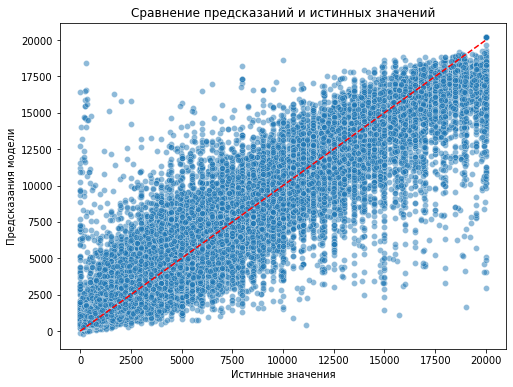

In [73]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # линия идеального совпадения
plt.xlabel("Истинные значения")
plt.ylabel("Предсказания модели")
plt.title("Сравнение предсказаний и истинных значений")
plt.show()

Ось X — истинные значения.
Ось Y — предсказания модели.
Красная пунктирная линия — идеальные предсказания (y = x).
Таким образом, распределение точек довольно плотное вдоль диагонали, что говорит о хорошем качестве модели.
Однако есть значительное рассеивание, особенно при высоких значениях (выше 10 000). Это говорит о более высокой погрешности на больших значениях. Модель имеет тенденцию к недооценке (точки часто ниже диагонали) — особенно в правой части графика.


Также построим график распределения ошибок. В идеале симметрия должна быть относительно нуля
— пик должен быть в точке 0, а левый и правый хвосты — примерно одинаковыми.
Форма, близкая к нормальному распределению (колоколообразная)
— большинство ошибок малы, а большие ошибки редки.
Отсутствие смещённости
— нет «перекоса» распределения влево или вправо.
Узкий диапазон ошибок (низкая дисперсия)
— означает высокую точность предсказаний.


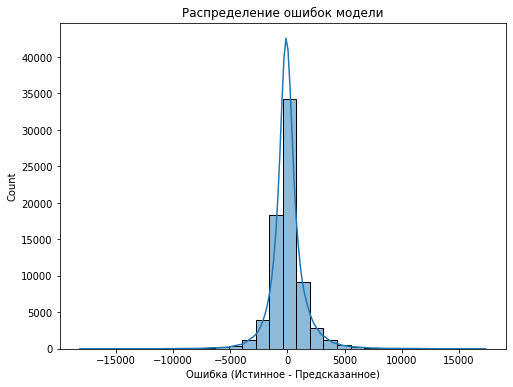

In [74]:
errors = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(errors, bins=30, kde=True)
plt.xlabel("Ошибка (Истинное - Предсказанное)")
plt.title("Распределение ошибок модели")
plt.show()

Центр распределения — в районе нуля, это говорит о том, что в среднем модель не сильно смещена.
Форма — близка к нормальной, но есть левый и правый хвосты, указывающие на значительные ошибки в обе стороны.
Плотная концентрация в районе нуля подтверждает, что большинство предсказаний точны.

## Общий вывод

### Общий вывод по проекту

В рамках проекта была решена задача построения модели для прогнозирования стоимости автомобилей по их характеристикам.

### Ход исследования:
- Проведена предварительная обработка данных:
  - обработаны пропуски и выбросы,
  - закодированы категориальные признаки с помощью One-Hot Encoding.
- Выполнен анализ корреляции признаков, выявлены сильно коррелирующие пары (например, `vehicle_type` и `model`).
- Данные разделены на обучающую и тестовую выборки.
- Обучены и протестированы несколько моделей регрессии:
  - **Linear Regression**
  - **Decision Tree Regressor** с подбором гиперпараметров
  - **LightGBM Regressor** с GridSearchCV

### Сравнение моделей по ключевым критериям

| Модель                   | RMSE | Время обучения      | Время предсказания  |
|--------------------------|-------------|----------------------|---------------------|
| Linear Regression        | 2588.378      | ~23 секунды          |  0.225 секунды          |
| Decision Tree Regressor  | 1626.804      | ~73 секунды  |0.443 секунды          |
| LightGBM Regressor       | 1560.732       | ~8 секунд  | 0.9616 секунды        |

### Основные выводы
- **Linear Regression** продемонстрировала худшее качество предсказаний (RMSE ~2588.378 ), но быстрое обучение.
- **Decision Tree Regressor** показал значительно более высокое качество, однако время обучения с подбором гиперпараметров значительно увеличилось.
- **LightGBM Regressor** достиг наилучшего качества (минимальное RMSE) и короткого времени предсказания, что делает его наиболее подходящим вариантом.
- Все модели показали быстрое время инференса (<1 секунды), что важно для использования в реальном сервисе.

### Рекомендация
- Для финального развёртывания рекомендуется использовать **LightGBM** с найденными гиперпараметрами.




<div class="alert alert-success">
<h3> Комментарий ревьюера <a class="tocSkip"> </h3> 
    
<b>Все отлично! 👍:</b> Отлично, с задачей в целом справились!

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнена загрузка и подготовка данных
- [ ]  Выполнено обучение моделей
- [ ]  Есть анализ скорости работы и качества моделей

<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту**

Мария, спасибо за твой проект! У тебя хорошая работа! В тебе виден будущий профессионал своего дела :) Однако есть еще моменты, которые требуют твоего внимания.
    
Кратко пройдусь по впечатлениям. 

**Отмечу отдельные положительные моменты проекта🙂**:
 
* Прекрасное владение инструментами обработки данных!
* Дополнение своими идеями - очень круто!
* Все этапы работы проделаны очень осмысленно! Каждый шаг снабжен пояснениями и выводами!
* Работа имеет четкую структуру и выполнена аккуратно, проверять - одно удовольствие!

    
**На что стоит обратить внимание🤓**:

* Скорректировать замер времени.
    

**Желаю удачи и жду твой проект на повторное ревью!**😉
    
<img src="https://99px.ru/sstorage/86/2015/12/image_86271215043043632690.gif" />

Спасибо большое! Учту свои ошибки

<div class="alert alert-success">
<b>Комментарий ревьюера 2:</b> Критических замечаний не осталось, проект засчитывается. Ты хорошо постаралась, было очень приятно с тобой поработать :) Желаю огромных успехов в дальнейшем обучении и карьерных достижений! 🍀